**Featured HR dataset from Kaggle **

This dataset is simulated

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:

    Satisfaction Level
    Last evaluation
    Number of projects
    Average monthly hours
    Time spent at the company
    Whether they have had a work accident
    Whether they have had a promotion in the last 5 years
    Departments (column sales)
    Salary
    Whether the employee has left


** Problem Statement **
            
            Giving the Circumstances surrounding the job (Satisfaction level, no of hours)  
            Which Person would likely to leave the Job and out of all the Circumstances 
            Surrounding the job which Circumstance motivate the people the most in leaving 
            Their Job. Thus the Problem is classic case of Binary Classification where the 
            Given set of observations our goal is to predict will the person likely to quit his job 

            The input Observations in the Dataset are Satisfaction Level, Last Evaluation
            Number Projects, Average_Monthly_Hours, Time_Spent_Company,Work  
            Accident , promotion Last 5 years, sales and Salary
            The Output (Labels ) would be Left wether the person is likely to quit his job or  
            not


**Project Overview and Metrices**
    
            A Featured Dataset from Kaggle Human Resource  Analytics Dataset explores  
            The motivation of recognizing the Persons Which will tend to leave the job giving                             
            The circumstances surrounding the Job and what are the top characteristic feature 
            Which motivate the People the most in leaving his/her Job.
            The Dataset will be important for the Companies in constantly recognizing that will
            It suffer the Brain Drain due to changing Circumstances and taking Steps accordingly
            Here is the link of Dataset https://www.kaggle.com/ludobenistant/hr-analytics
            
            To calculate the Final results the precision would be my option which will tell how     
            Accurately i classified my Test as well as Holdout Dataset



In [209]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
data=pd.read_csv('HR_comma_sep.csv')

In [6]:
data.head()   #Reading the Dataset Head or top 5 elements

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### No null Values in the Dataset and therefore no preprocessing in terms of filling

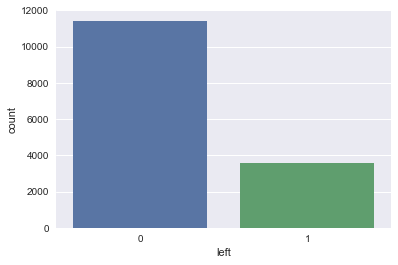

In [8]:
sns.countplot(x='left',data=data)
#Here O defines the People are not Survived
#Here 1 defined the people who survived

### Dataset Labels are heavily Unbalanced fortunately ensemble classifiers are pretty robust to it

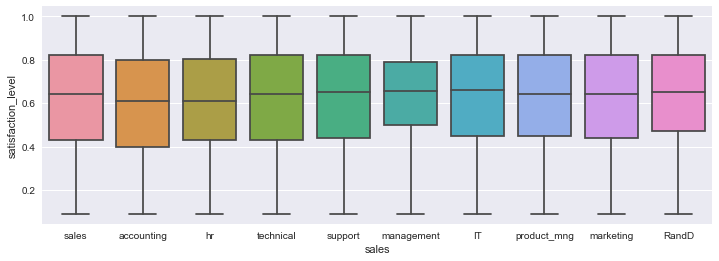

In [9]:
plt.figure(figsize=(12,4))
sns.boxplot(x='sales',y='satisfaction_level',data=data)

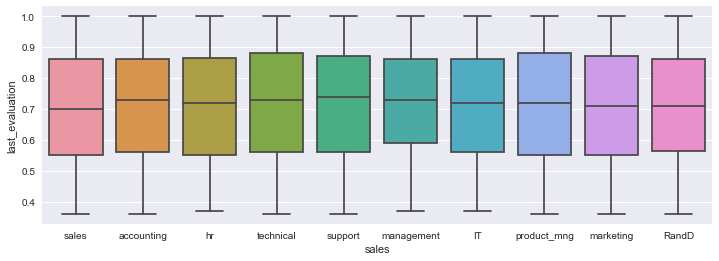

In [10]:
plt.figure(figsize=(12,4))
sns.boxplot(x='sales',y='last_evaluation',data=data)

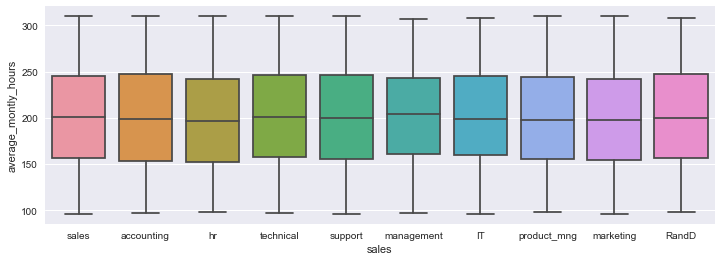

In [11]:
plt.figure(figsize=(12,4))
sns.boxplot(x='sales',y='average_montly_hours',data=data)

### So far the Continuous Dataset Features are pretty robust and no change is likely to be needed

In [13]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


### Apart from the Average_mothly hours which is expected none continuos feature seems to be too far from each other

In [21]:
pd.get_dummies(data).columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

#### Above the Sales and Salary Categorical feature has been succesfully converted into one hot encding while the other two features need not reauire encoding

In [22]:
data1=pd.get_dummies(data,drop_first=True)

#### Here the drop true mathed is Marked True to avoid perfect Relationship and avoid chance of overhitting

In [23]:
from sklearn.model_selection import train_test_split

In [34]:
X=data1.drop('left',axis=1)
y=data1['left']

# Converting the dataset into Training and testing

In [194]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Splitting the dataset into Train and Test

In [36]:
X_holdout, X_test, y_holdout, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Splitting the test dataset into actual test and holdout

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
dtree = DecisionTreeClassifier(random_state=14)

In [179]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best')

In [180]:
predictions = dtree.predict(X_holdout)  #Predicting againt Holdout dataset

In [181]:
from sklearn.metrics import classification_report

In [182]:
print(classification_report(y_holdout,predictions))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2542
          1       0.92      0.96      0.94       774

avg / total       0.97      0.97      0.97      3316



#### Decision Tree our benchmark model have got a massive Accuracy in holdout dataset

In [44]:
from sklearn.grid_search import GridSearchCV #Importing Grid Search


In [135]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest

In [183]:
Classifier=RandomForestClassifier(random_state=21)

In [184]:
Classifier.fit(X_train,y_train) #Fitting against Train Data set

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=21,
            verbose=0, warm_start=False)

In [185]:
parameters={
    "n_estimators": [10,15,5,20],
    "min_samples_split": [2,3,4],
    "min_samples_leaf": [1,2,3]
}

In [186]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
scorer = make_scorer(precision_score)


In [187]:
rid_obj = GridSearchCV(Classifier, parameters,scoring=scorer) #Making A GRID SEARCH OBJECT

In [188]:
grid_fit = rid_obj.fit(X_test, y_test) #Training And Value

In [189]:
Classifier.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [190]:
best_clf = grid_fit.best_estimator_ #Get the Best Classifier


In [191]:
Predict=best_clf.predict(X_holdout)  #predicting against Holdout

In [192]:
print(classification_report(y_holdout,Predict))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2542
          1       0.97      0.89      0.93       774

avg / total       0.97      0.97      0.97      3316



#### We find that Decison Tree was very robust in this Dataset and got the Same Score as Decision Tree which signifies prescencs of non dominating Features

In [201]:
X=best_clf.feature_importances_

In [202]:
X

array([ 0.34765793,  0.11709217,  0.18474546,  0.12733978,  0.18379782,
        0.00901906,  0.0022888 ,  0.00071283,  0.0008868 ,  0.0017607 ,
        0.00106316,  0.00098549,  0.00076705,  0.00234416,  0.0040063 ,
        0.00465434,  0.00756838,  0.00330977])

In [205]:
Most_Ratio=pd.Series(X,index=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'])

In [206]:
print(Most_Ratio)

satisfaction_level       0.347658
last_evaluation          0.117092
number_project           0.184745
average_montly_hours     0.127340
time_spend_company       0.183798
Work_accident            0.009019
promotion_last_5years    0.002289
sales_RandD              0.000713
sales_accounting         0.000887
sales_hr                 0.001761
sales_management         0.001063
sales_marketing          0.000985
sales_product_mng        0.000767
sales_sales              0.002344
sales_support            0.004006
sales_technical          0.004654
salary_low               0.007568
salary_medium            0.003310
dtype: float64


#### We find that Out of all Satisfaction Level of individual matters a lost in determing if a person will lose the job